In [153]:
%matplotlib inline
import random, torch, torchvision
from d2l import torch as d2l

In [154]:
torch.cuda.is_available(), torch.cuda.device(0), torch.cuda.device_count(), torch.cuda.get_device_name(0)

(True, <torch.cuda.device at 0x7f28b84eaf50>, 1, 'NVIDIA GeForce GTX 1050 Ti')

In [155]:
def syn_data(w, b, num):
    x = torch.normal(0, 1, (num, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [156]:
t_w = torch.tensor([2, -3.4])
t_b = 4.2
f, l = syn_data(t_w, t_b, 1000)
f[0], l[0]

(tensor([-0.0763, -0.0797]), tensor([4.3355]))

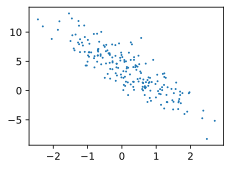

In [157]:
d2l.set_figsize()
d2l.plt.scatter(f[1:200,1].detach().numpy(), l[1:200].detach().numpy(), 1)

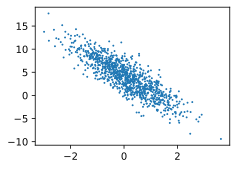

In [158]:
d2l.set_figsize()
d2l.plt.scatter(f[:,1].detach().numpy(), l.detach().numpy(), 1)

In [159]:
def example():
    x = 1
    return x

example = example()
example, type(example)

(1, int)

In [160]:
def example_g():
    x = 1
    yield x
    yield x + 1
    yield x + 2
e_g = example_g()
e_g, type(e_g)

(<generator object example_g at 0x7f28bed8b840>, generator)

In [161]:
for i in e_g:
    print(i)

1
2
3


In [162]:
e = example_g()
next(e), next(e), next(e)

(1, 2, 3)

In [163]:
def data_iter(batch_size, f, l):
    num = len(f)
    indices = list(range(num))
    random.shuffle(indices)
    for i in range(0, num, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num)])
        yield f[batch_indices], l[batch_indices]

In [164]:
batch_size = 10
for x, y in data_iter(batch_size, f, l):
    print(x, '\n', y)
    break

tensor([[ 1.7203, -0.4650],
        [-0.4627,  0.1669],
        [ 0.5268,  0.8152],
        [-0.9178,  0.2446],
        [ 0.3236, -1.2058],
        [ 0.5486,  1.2049],
        [ 0.1861, -1.6751],
        [ 1.1022, -0.4694],
        [ 0.4812, -1.0230],
        [ 0.1230,  0.9207]]) 
 tensor([[ 9.2227],
        [ 2.7285],
        [ 2.4766],
        [ 1.5283],
        [ 8.9598],
        [ 1.1834],
        [10.2673],
        [ 7.9985],
        [ 8.6234],
        [ 1.3110]])


In [165]:
w, b = torch.normal(0, 0.01, size=(2,1), requires_grad=True), torch.zeros(1, requires_grad=True)

In [166]:
def linreg(x, w, b):
    return torch.matmul(x, w) + b

In [167]:
def squared_loss(y_h, y):
    return (y_h - y.reshape(y_h.shape)) ** 2 / 2

In [168]:
def sgd(p, lr, batch_size):
    with torch.no_grad():
        for param in p:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [169]:
lr, epochs, net, loss = 0.03, 5, linreg, squared_loss

In [170]:
for x, y in data_iter(batch_size, f, l):
    ls = loss(net(x, w, b), y)

In [171]:
ls.sum().backward()

In [172]:
sgd([w, b], lr, batch_size)

In [173]:
a = net(f, w, b)
ashape = a.shape
l.reshape(ashape)
lshape = l.shape
ashape, lshape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [174]:
tl = loss(net(f, w, b), l)
tl.shape, tl.mean()

(torch.Size([1000, 1]), tensor(14.3262, grad_fn=<MeanBackward0>))

In [175]:
for epoch in range(epochs):
    for x, y in data_iter(batch_size, f, l):
        ls = loss(net(x, w, b), y)
        ls.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        tl = loss(net(f, w, b), l)
        print(f'{float(tl.mean()):f}')

0.048755
0.000232
0.000054
0.000053
0.000053


In [176]:
t_w - w.reshape(t_w.shape)

tensor([-1.2541e-04, -4.4346e-05], grad_fn=<SubBackward0>)

In [177]:
t_b - b

tensor([0.0003], grad_fn=<RsubBackward1>)

In [178]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [179]:
tw = torch.tensor([2, -3.4])
tb = 4.2
fea, lab = d2l.synthetic_data(tw, tb, 1000)

In [180]:
def load_array(data_array, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_array)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((fea, lab), batch_size)

In [181]:
next(iter(data_iter))

[tensor([[ 0.3640, -0.3436],
         [ 0.1008, -1.2246],
         [ 0.3484, -0.7626],
         [-0.5222, -0.3640],
         [-0.8624, -0.2098],
         [ 2.3836, -2.0263],
         [ 0.4155,  0.1824],
         [-1.3164,  0.2040],
         [-0.1462, -2.4436],
         [ 1.1008, -0.1072]]),
 tensor([[ 6.0917],
         [ 8.5685],
         [ 7.4770],
         [ 4.3818],
         [ 3.1832],
         [15.8657],
         [ 4.4123],
         [ 0.8944],
         [12.2015],
         [ 6.7650]])]

In [182]:
from torch import nn 
net = nn.Sequential(nn.Linear(2, 1))

In [183]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [184]:
loss = nn.MSELoss()

In [185]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [186]:
epochs = 3
for epoch in range(epochs):
    for x, y in data_iter:
        l = loss(net(x), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(fea), lab)
    print(f'{l:f}')

0.000334
0.000100
0.000101


In [187]:
w = net[0].weight.data
print('w的估计误差', tw - w.reshape(tw.shape))
b = net[0].bias.data
print('b的估计误差', tb - b)

w的估计误差 tensor([-0.0001,  0.0004])
b的估计误差 tensor([-0.0009])
